### Genome-wide association study
По сути это продолжение прошлого ноутбука **DEA Example**, но здесь мы рассмотрим более высокоуровненвый анализ с помощью различных статистических методов

Зачем нужен GWAS?

For example, a meta-analysis accomplished in 2018 revealed the discovery of 70 new loci associated with atrial fibrillation. It has been identified different variants associated with transcription factor coding-genes, such as TBX3 and TBX5, NKX2-5 o PITX2, which are involved in cardiac conduction regulation, in ionic channel modulation and cardiac development. It was also identified new genes involved in tachycardia (CASQ2) or associated with alteration of cardiac muscle cell communication (PKP2). (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6136836/)

In [48]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("EnhancedVolcano")
BiocManager::install("qqman")

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'EnhancedVolcano'

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'oligo', 'oligoClasses', 'ps', 'sys', 'tidyr'

Bioconductor version 3.11 (BiocManager 1.30.10), R 4.0.2 (2020-06-22)

Installing package(s) 'qqman'

also installing the dependency ‘calibrate’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'bit', 'bit64', 'data.table', 'dplyr', 'ff', 'GOSemSim', 'httr',
  'oligo', 'oligoClasses', 'ps', 'sys', 'tidyr'



In [49]:
library(qqman)
library(EnhancedVolcano)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, S.D. qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. biorXiv DOI: 10.1101/005165 (2014).





In [26]:
?read.csv

In [31]:
allStat <- read.csv("../data/allStat.csv")
rownames(allStat) <- allStat$X
allStat$X <- NULL
head(allStat)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
XM_928134,-0.2046438,5.792044,-71.72330,1.331904e-15,1.386346e-11,26.52292
NM_020988,-0.2231934,5.779746,-69.27451,1.924279e-15,1.386346e-11,26.14409
NM_004171,-0.1970937,5.764135,-65.30063,3.597134e-15,1.386346e-11,25.52520
NM_020465,-0.1681720,5.802666,-65.11902,3.704781e-15,1.386346e-11,25.47832
NM_020309,-0.2613279,5.751026,-64.58773,4.040482e-15,1.386346e-11,25.30084
NM_133499,-0.2447043,5.756075,-63.02188,5.239348e-15,1.386346e-11,25.10621


In [39]:
# Как вы можете заметить у нас Медиана по P value  меньше порога в 0.01
# Это значит, что у нас как минимум половина генов
# Важны.
# В реальных датасетах Медиана скорее всего будет существенно выше
# Просто у нас так получилось из-за особенностей датасета
summary(allStat$P.Value)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000000 0.0000000 0.0000232 0.0824922 0.0183538 0.9991610 

In [44]:
# Реальности у нас примерно 72 процента генов
# имеют существенное значение
sum(allStat$P.Value < 0.01) / dim(allStat)[1]

[1] 0.7225833

### Volcanoplot

In [3]:
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



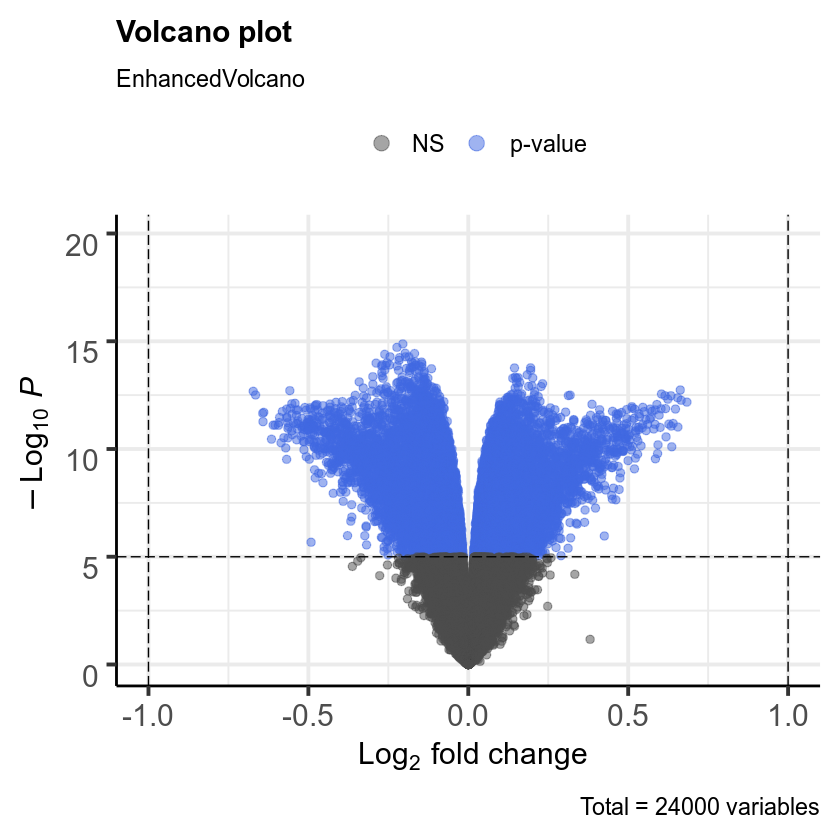

In [32]:
# NS - это гены, которые не сильно влияют
EnhancedVolcano(allStat,
                lab = rownames(allStat),
                x = 'logFC',
                y = 'P.Value',
                xlim = c(-1, 1))

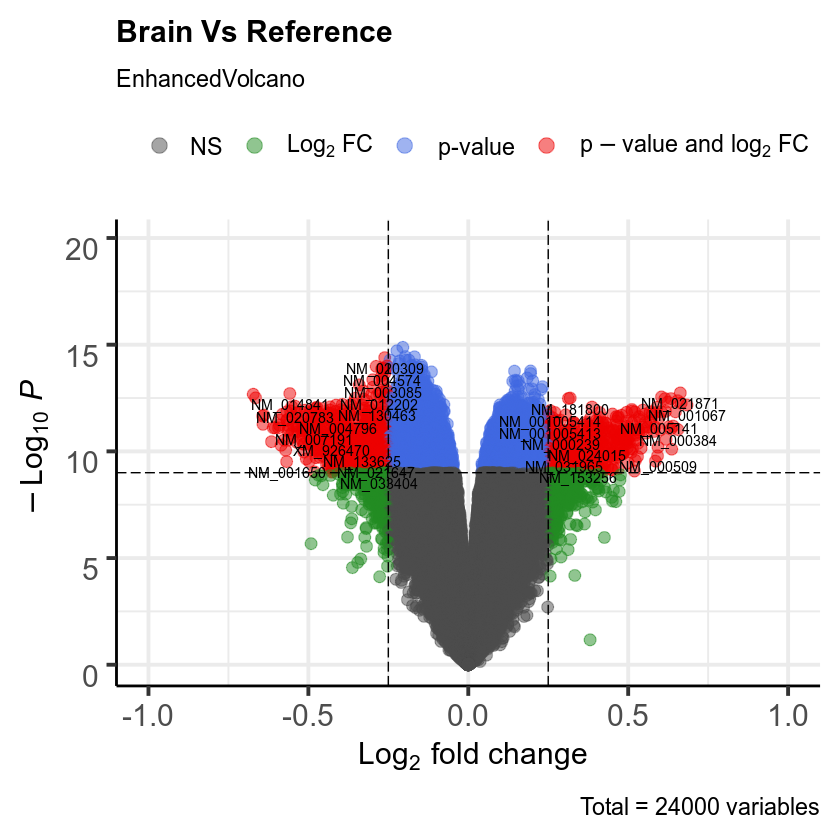

In [36]:
EnhancedVolcano(allStat,
                lab = rownames(allStat),
                x = 'logFC',
                y = 'P.Value',
                title = 'Brain Vs Reference',
                pCutoff = 10e-10,
                FCcutoff = 0.25,
                pointSize = 3.0,
                labSize = 3.0,
                xlim = c(-1, 1))

### QQ Plot

In [50]:
library(qqman)

In [59]:
head(gwasResults)

,SNP,CHR,BP,P
,<chr>,<int>,<int>,<dbl>
1,rs1,1,1,0.9148060
2,rs2,1,2,0.9370754
3,rs3,1,3,0.2861395
4,rs4,1,4,0.8304476
5,rs5,1,5,0.6417455
6,rs6,1,6,0.5190959


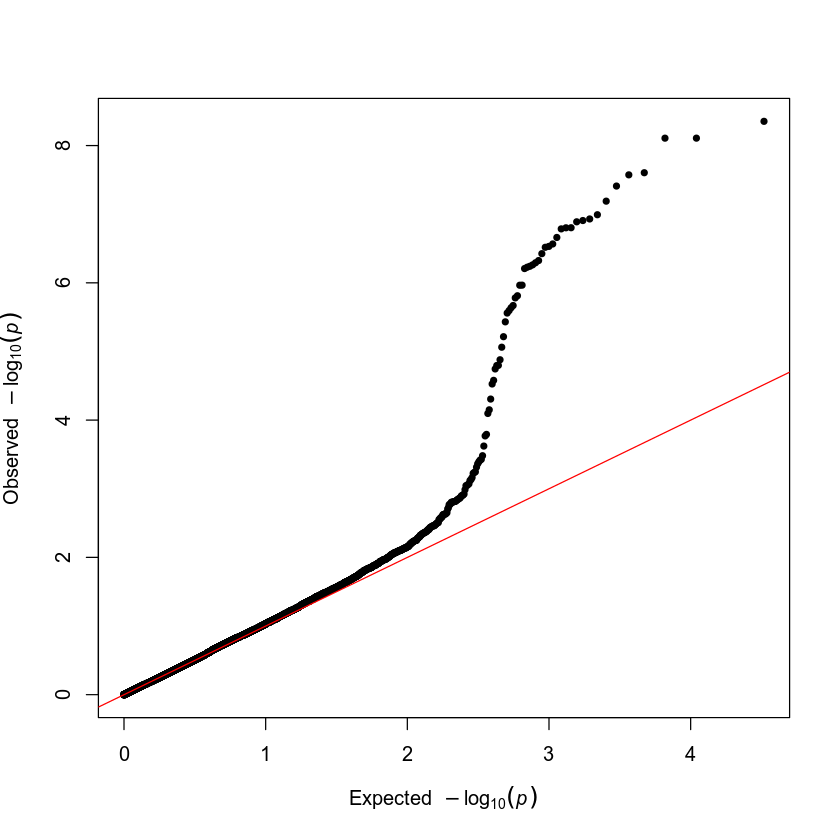

In [53]:
# Пример из библиотеки qqman
qqman::qq(gwasResults$P)

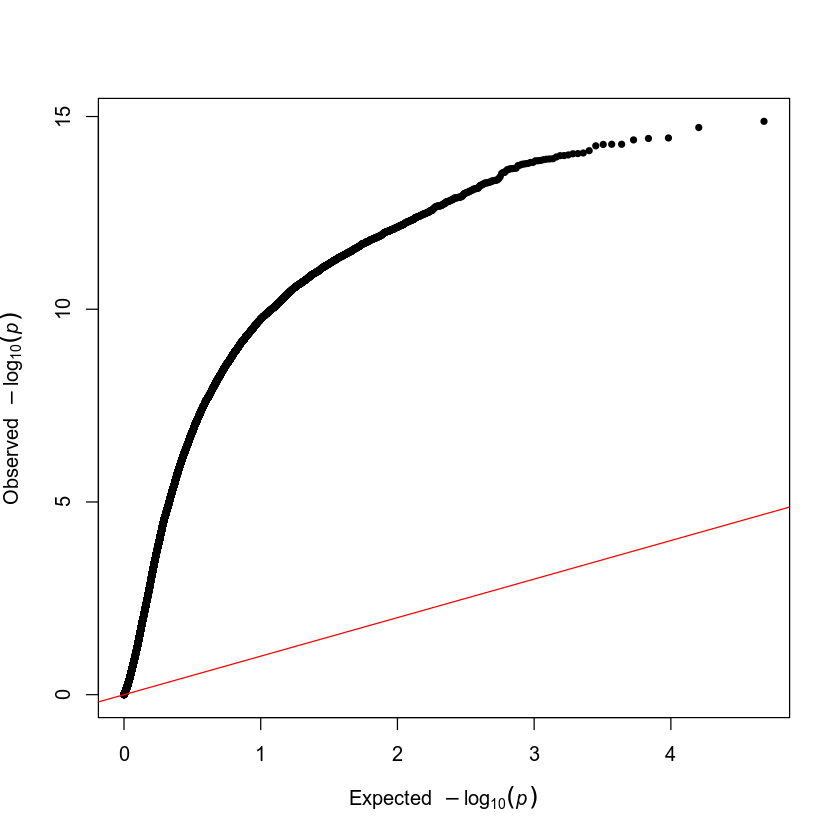

In [54]:
# Такой график говорит о том, что наши данные распределены не нормально
qqman::qq(allStat$P.Value)

### Manhattan plot

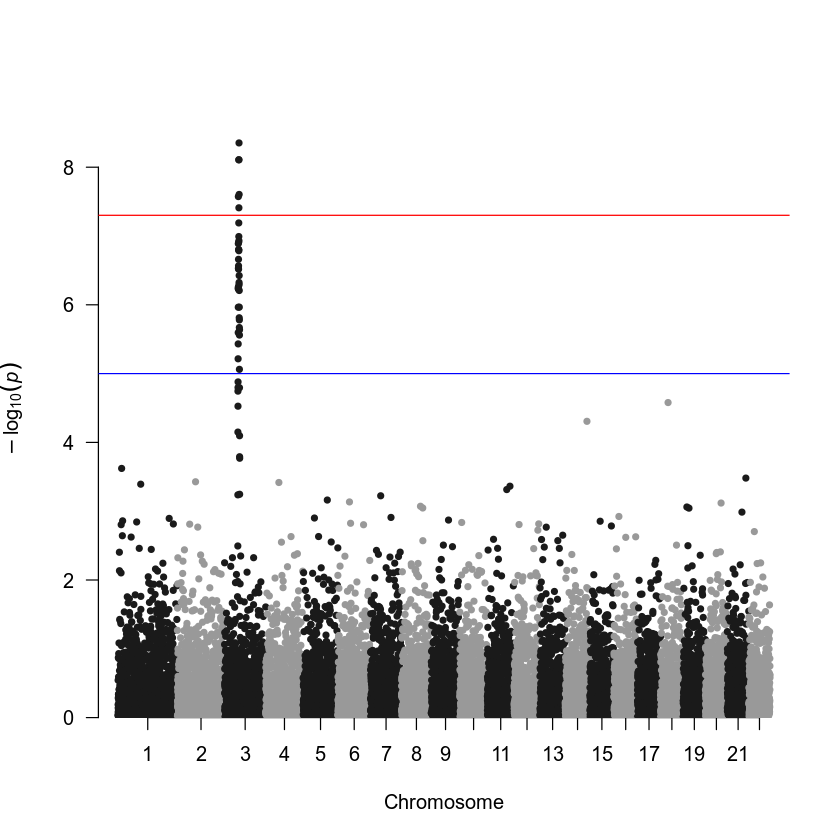

In [55]:
manhattan(gwasResults)

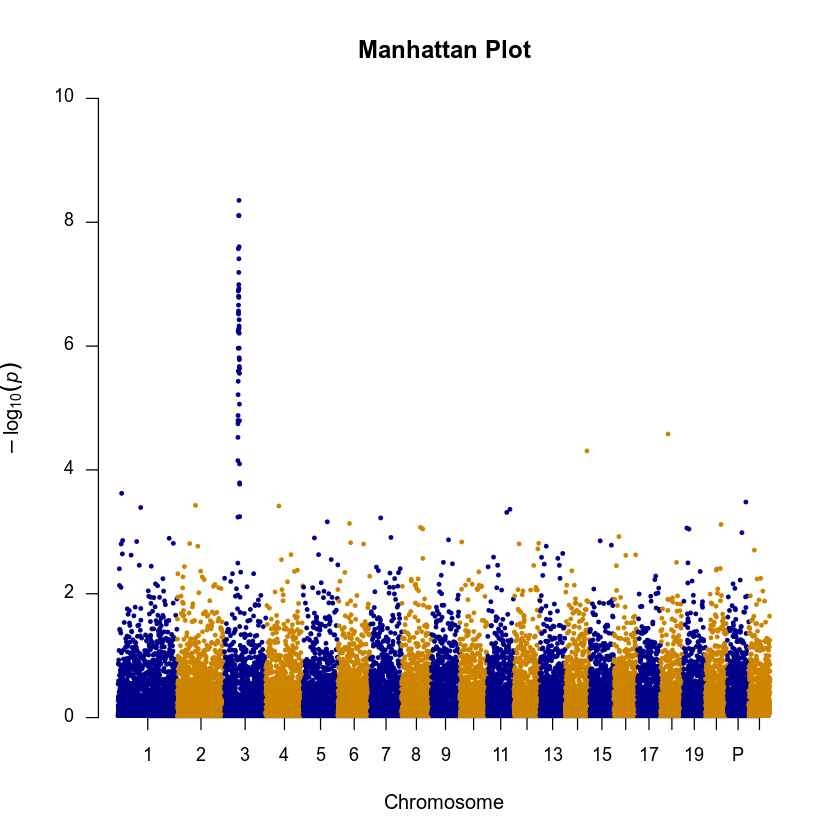

In [56]:
manhattan(gwasResults, main = "Manhattan Plot", ylim = c(0, 10), cex = 0.6, 
    cex.axis = 0.9, col = c("blue4", "orange3"), suggestiveline = F, genomewideline = F, 
    chrlabs = c(1:20, "P", "Q"))

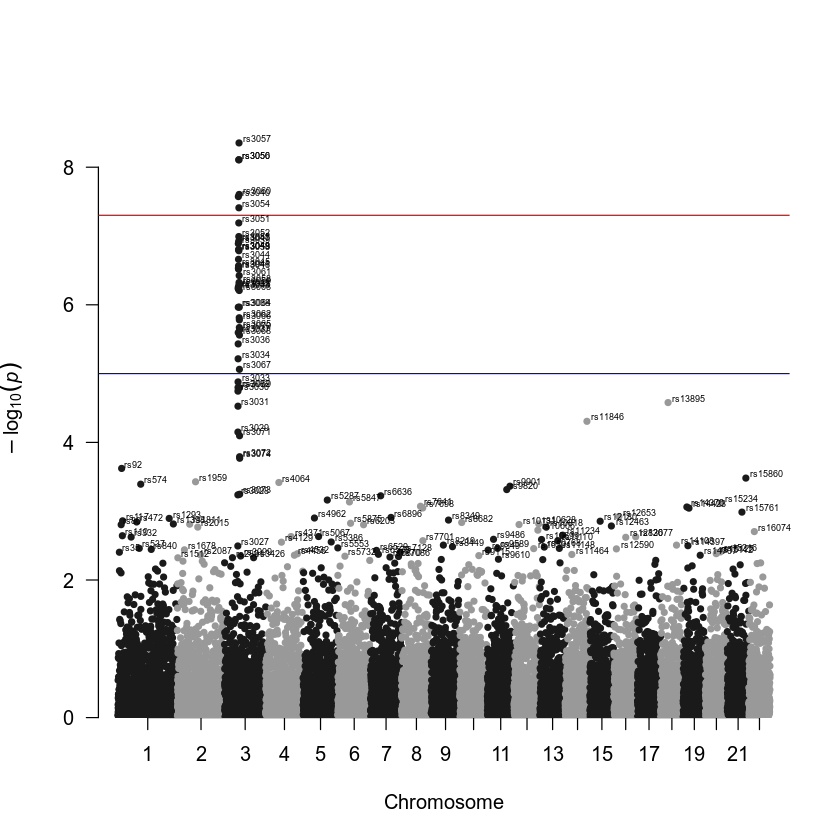

In [57]:
manhattan(gwasResults, annotatePval = 0.005, annotateTop = FALSE)